In [6]:
%%capture
!pip install stopwords
!pip install nltk
!pip install swifter

In [8]:
pip install rn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rn: filename=rn-1.0.2-py3-none-any.whl size=9012 sha256=0cad7e5299e3e05689ce4bace41498add61a4a29adbccdb1dc35030288a22cdd
  Stored in directory: /root/.cache/pip/wheels/44/31/ff/af367825e55398734fefca0744e769283651edc03521cee310
Successfully built rn


In [2]:
pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-

In [3]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

2024-06-17 11:45:56,451 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpfdp4f82k


100%|██████████| 253M/253M [00:13<00:00, 19.0MB/s]

2024-06-17 11:46:10,897 copying /tmp/tmpfdp4f82k to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-06-17 11:46:11,575 removing temp file /tmp/tmpfdp4f82k


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

                                          Comentarios Sentimento
0           Este espumante é incrível, estou viciado!   POSITIVE
1   A borbulha é fina e persistente, e o sabor é c...   POSITIVE
2   Não gostei do aroma, achei um pouco forte demais.   POSITIVE
3   Os aromas frutados e florais são muito agradáv...   POSITIVE
4               Adorei a cor dourada deste espumante!   POSITIVE
5   A acidez equilibrada torna este espumante perf...   NEGATIVE
6   Não recomendaria este espumante para quem pref...   NEGATIVE
7   Estou impressionado com a qualidade deste espu...   POSITIVE
8   A variedade de uvas utilizadas na produção des...   POSITIVE
9   A temperatura ideal de serviço deste espumante...   POSITIVE
10  Os aromas cítricos e minerais são muito refres...   POSITIVE
11  Este espumante é um pesadelo para quem está de...   POSITIVE
12  Ótima experiência para brindar um momento espe...   POSITIVE
13  Fiquei desapontado com a falta de opções de es...   POSITIVE
14   Estou apaixonado por

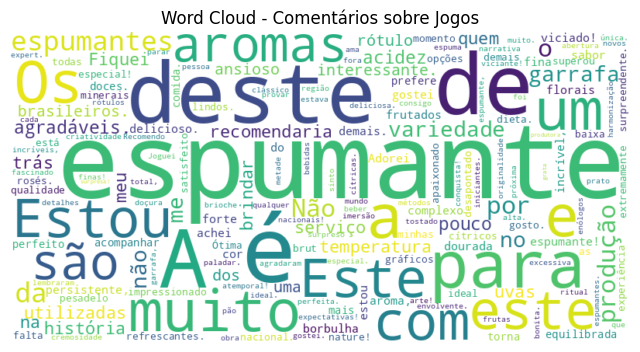

In [4]:
comentarios = [
    "Este espumante é incrível, estou viciado!",
    "A borbulha é fina e persistente, e o sabor é complexo e delicioso.",
    "Não gostei do aroma, achei um pouco forte demais.",
    "Os aromas frutados e florais são muito agradáveis.",
    "Adorei a cor dourada deste espumante!",
    "A acidez equilibrada torna este espumante perfeito para acompanhar a comida.",
    "Não recomendaria este espumante para quem prefere espumantes mais doces.",
    "Estou impressionado com a qualidade deste espumante nacional.",
    "A variedade de uvas utilizadas na produção deste espumante é surpreendente.",
    "A temperatura ideal de serviço deste espumante é um pouco baixa demais para o meu gosto.",
    "Os aromas cítricos e minerais são muito refrescantes.",
    "Este espumante é um pesadelo para quem está de dieta.",
    "Ótima experiência para brindar um momento especial!",
    "Fiquei desapontado com a falta de opções de espumantes rosés.",
    "Estou apaixonado por este espumante brut nature!",
    "A história por trás deste espumante é muito interessante.",
    "Os gráficos no rótulo deste espumante são lindos.",
    "Estou extremamente satisfeito com a variedade de uvas utilizadas na produção de espumantes brasileiros.",
    "Este espumante superou todas as minhas expectativas!",
    "A harmonização com o prato foi perfeita.",
    "Os detalhes no rótulo deste espumante são incríveis, cada garrafa é única.",
    "A abertura da garrafa é um ritual especial.",
    "A cremosidade da espuma deste espumante é deliciosa.",
    "Os aromas de pão tostado e brioche são muito agradáveis.",
    "A narrativa por trás da produção deste espumante é envolvente.",
    "Recomendo este espumante para qualquer pessoa que ama bebidas finas!",
    "Este espumante é um clássico atemporal!",
    "Fiquei surpreso com a originalidade e criatividade dos enólogos brasileiros.",
    "Estou ansioso por provar novos rótulos de espumantes nacionais!",
    "Os aromas deste espumante não me agradaram muito.",
    "A doçura deste espumante é excessiva para o meu paladar.",
    "Não consigo parar de beber este espumante, é viciante!",
    "A acidez deste espumante é muito alta.",
    "Este espumante é uma obra de arte!",
    "A temperatura de serviço deste espumante não estava ideal.",
    "Estou fascinado com a variedade de métodos de produção de espumantes.",
    "A garrafa deste espumante é muito bonita.",
    "Joguei fora metade da garrafa, não gostei.",
    "A imersão no mundo dos espumantes é total, me sinto um expert.",
    "Não recomendaria este espumante para iniciantes.",
    "Estou ansioso para brindar a próxima conquista!",
    "Os aromas deste espumante me lembraram de frutas cítricas.",
    "A história da região produtora deste espumante é muito interessante.",
    "Este espumante é uma grata surpresa!"
]
# Criando um DataFrame com os comentários
data = pd.DataFrame({'Comentarios': comentarios})

# Inicializando o modelo Flair para análise de sentimento
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# Função para analisar o sentimento de cada comentário
def analisar_sentimento(text):
    sentence = Sentence(text)
    flair_sentiment.predict(sentence)
    return sentence.labels[0].value

# Aplicando a análise de sentimento aos comentários
data['Sentimento'] = data['Comentarios'].apply(analisar_sentimento)

# Exibindo os resultados da análise de sentimento
print(data)

# Criando um WordCloud
stop_words = set()
filtered_words = ' '.join(data['Comentarios']).split()

word_counter = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Visualizando o WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Comentários sobre Jogos')
plt.show()



In [11]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random as rn
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image

comentarios = [
    "Os aromas são incríveis, mas a doçura poderia ser menor.",
    "Adoro a cremosidade da espuma deste espumante!",
    "É viciante, não consigo parar de beber.",
    "As uvas utilizadas neste espumante são bem selecionadas, mas o método de produção poderia ser melhor.",
    "Que espumante envolvente! A história por trás da marca é fascinante.",
    "Estou um pouco decepcionado com a falta de variedade de harmonizações.",
    "A acidez deste espumante é ótima, mas os aromas são um pouco fracos.",
    "Os efeitos sonoros da abertura da garrafa são imersivos, me sinto em uma celebração.",
    "Um dos melhores espumantes que já degustei!",
    "A temperatura de serviço deste espumante precisa ser mais precisa."
]
# Embaralhando os comentários para análise aleatória
rn.shuffle(comentarios)

# Criando um DataFrame com os comentários
data = pd.DataFrame({'Comentarios': comentarios})

# Inicializando o modelo Flair para análise de sentimento
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# Função para analisar o sentimento de cada comentário
def analisar_sentimento(text):
    sentence = Sentence(text)
    flair_sentiment.predict(sentence)
    return sentence.labels[0].value, sentence.labels[0].score

# Aplicando a análise de sentimento aos comentários
data[['Sentimento', 'Confianca']] = data['Comentarios'].apply(analisar_sentimento).apply(pd.Series)

# Exibindo os resultados da análise de sentimento
print(data)


                                         Comentarios Sentimento  Confianca
0  As uvas utilizadas neste espumante são bem sel...   POSITIVE   0.993791
1  Estou um pouco decepcionado com a falta de var...   POSITIVE   0.907050
2  Os efeitos sonoros da abertura da garrafa são ...   POSITIVE   0.871595
3     Adoro a cremosidade da espuma deste espumante!   POSITIVE   0.925158
4  A acidez deste espumante é ótima, mas os aroma...   NEGATIVE   0.597395
5  Que espumante envolvente! A história por trás ...   POSITIVE   0.999506
6            É viciante, não consigo parar de beber.   NEGATIVE   0.968115
7  A temperatura de serviço deste espumante preci...   POSITIVE   0.983753
8        Um dos melhores espumantes que já degustei!   POSITIVE   0.922473
9  Os aromas são incríveis, mas a doçura poderia ...   POSITIVE   0.844812


h
